In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('boxoffice.csv')
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170
2693,Interstellar,158336835,77904664,Universal,132903825,3914,93959844,PG-13,Comedy,170


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [6]:
to_remove= ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

In [7]:
df.isnull().sum() * 100 / df.shape[0]

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,76732721.25,152572473.5,2.247314e+08,299810741.0
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1161.00,2271.5,3.392250e+03,4499.0
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,78618761.50,156256716.0,2.274832e+08,299859703.0
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,47.00,91.0,1.350000e+02,179.0


In [9]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 
    
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 

    df[col] = pd.to_numeric(df[col], errors='coerce')

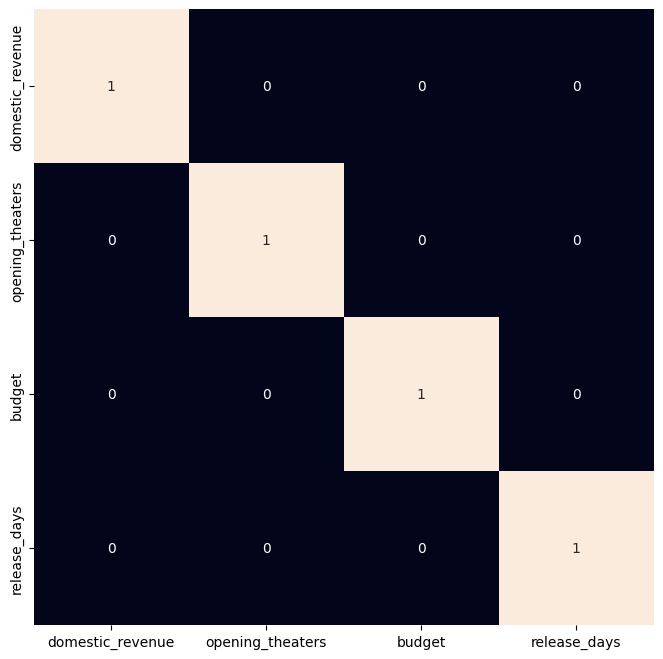

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 8))
sb.heatmap(df.select_dtypes(include=np.number). corr()>0.8,
           annot=True, 
           cbar =False,)

plt.show()

In [14]:
features = df.drop(['title', 'domestic_revenue'], axis=1)
target = df['domestic_revenue'].values

X_train, X_Val, y_train, y_val = train_test_split(features, target,
                                                     test_size=0.1, 
                                                     random_state=22)
X_train.shape, X_Val.shape


((2424, 6), (270, 6))